In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("Jisdoredit1.csv", parse_dates = True, index_col = 0)
train = df['Rate'][:505].to_numpy()
test = df['Rate'][500:].to_numpy()
sc = MinMaxScaler(feature_range=(0,1))
train = sc.fit_transform(train.reshape(-1,1))
test = sc.transform(test.reshape(-1,1))

def data_preparation(data):
    x = []
    y = []
    
    for i in range(5, len(data)):
        x.append(data[i-5:i, 0])
        y.append(data[i])
    x, y = np.array(x), np.array(y)
    
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))
    return x, y

x_train, y_train = data_preparation(train)
x_test, y_test = data_preparation(test)

model = Sequential()
model.add(LSTM(units=5, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=5))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer = 'adam', loss ='mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 200, batch_size = 4)

Epoch 1/200
125/125 [==============================] - 7s 13ms/step - loss: 0.0227 - accuracy: 0.0020
Epoch 2/200
125/125 [==============================] - 2s 13ms/step - loss: 0.0098 - accuracy: 0.0040
Epoch 3/200
125/125 [==============================] - 2s 13ms/step - loss: 0.0084 - accuracy: 0.0040
Epoch 4/200
125/125 [==============================] - 2s 13ms/step - loss: 0.0064 - accuracy: 0.0040
Epoch 5/200
125/125 [==============================] - 2s 13ms/step - loss: 0.0063 - accuracy: 0.0040
Epoch 6/200
125/125 [==============================] - 2s 13ms/step - loss: 0.0057 - accuracy: 0.0040
Epoch 7/200
125/125 [==============================] - 2s 13ms/step - loss: 0.0069 - accuracy: 0.0040
Epoch 8/200
125/125 [==============================] - 2s 13ms/step - loss: 0.0048 - accuracy: 0.0040
Epoch 9/200
125/125 [==============================] - 2s 13ms/step - loss: 0.0044 - accuracy: 0.0040
Epoch 10/200
125/125 [==============================] - 2s 12ms/step - loss: 0.006

125/125 [==============================] - 2s 13ms/step - loss: 0.0036 - accuracy: 0.0040
Epoch 81/200
125/125 [==============================] - 2s 13ms/step - loss: 0.0028 - accuracy: 0.0040
Epoch 82/200
125/125 [==============================] - 2s 13ms/step - loss: 0.0025 - accuracy: 0.0040
Epoch 83/200
125/125 [==============================] - 2s 13ms/step - loss: 0.0031 - accuracy: 0.0040
Epoch 84/200
125/125 [==============================] - 2s 13ms/step - loss: 0.0027 - accuracy: 0.0040
Epoch 85/200
125/125 [==============================] - 1s 12ms/step - loss: 0.0026 - accuracy: 0.0040
Epoch 86/200
125/125 [==============================] - 2s 12ms/step - loss: 0.0027 - accuracy: 0.0040
Epoch 87/200
125/125 [==============================] - 2s 13ms/step - loss: 0.0027 - accuracy: 0.0040
Epoch 88/200
125/125 [==============================] - 2s 13ms/step - loss: 0.0030 - accuracy: 0.0040
Epoch 89/200
125/125 [==============================] - 2s 13ms/step - loss: 0.0025 - 

125/125 [==============================] - 2s 12ms/step - loss: 0.0021 - accuracy: 0.0040
Epoch 160/200
125/125 [==============================] - 2s 12ms/step - loss: 0.0021 - accuracy: 0.0040
Epoch 161/200
125/125 [==============================] - 2s 12ms/step - loss: 0.0023 - accuracy: 0.0040
Epoch 162/200
125/125 [==============================] - 1s 12ms/step - loss: 0.0023 - accuracy: 0.0040
Epoch 163/200
125/125 [==============================] - 1s 12ms/step - loss: 0.0018 - accuracy: 0.0040
Epoch 164/200
125/125 [==============================] - 1s 12ms/step - loss: 0.0025 - accuracy: 0.0040
Epoch 165/200
125/125 [==============================] - 1s 12ms/step - loss: 0.0022 - accuracy: 0.0040
Epoch 166/200
125/125 [==============================] - 1s 12ms/step - loss: 0.0022 - accuracy: 0.0040
Epoch 167/200
125/125 [==============================] - 1s 11ms/step - loss: 0.0023 - accuracy: 0.0040
Epoch 168/200
125/125 [==============================] - 1s 12ms/step - loss: 

2/2 [==============================] - 1s 14ms/step


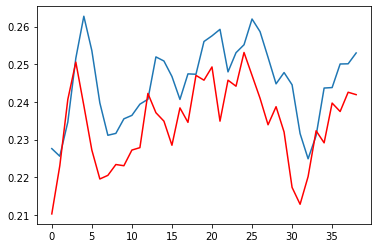

In [2]:
y_pred = model.predict(x_test)
fig, ax = plt.subplots()
ax.plot(y_pred)
ax.plot(y_test, c = 'r')

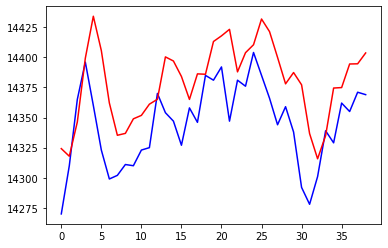

In [3]:
y_pred = sc.inverse_transform(y_pred)
ig, ax = plt.subplots()
y_real = df['Rate'].to_numpy()
ax.plot(y_real[505:], color ='b', label = 'Real Rate')
ax.plot(y_pred, color ='r', label = 'Forcaste Rate')

<function matplotlib.pyplot.show(close=None, block=None)>

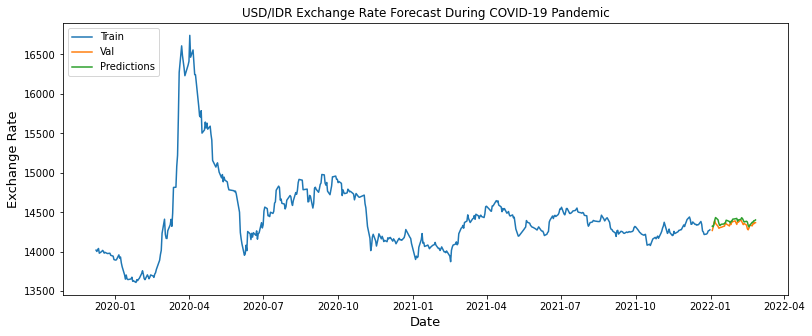

In [4]:
pd.options.mode.chained_assignment = None

dtrain = df[:505]
valid = df[505:]
valid['Predictions'] = y_pred

plt.figure(figsize=(13,5))
plt.title('USD/IDR Exchange Rate Forecast During COVID-19 Pandemic')
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Exchange Rate', fontsize = 13)
plt.plot(dtrain['Rate'])
plt.plot(valid[['Rate', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'upper left')
plt.show

In [5]:
newtest = df['Rate'][505:].to_numpy()
mse = np.square(np.subtract(newtest,y_pred)).mean()
mse

3298.5000503378274

In [6]:
rmse = np.sqrt(np.mean((y_pred - newtest)**2))
rmse

57.4325695954641

In [7]:
mape = np.mean(np.abs((newtest - y_pred)/ newtest))*100
mape

0.3259485938700511

<function matplotlib.pyplot.show(close=None, block=None)>

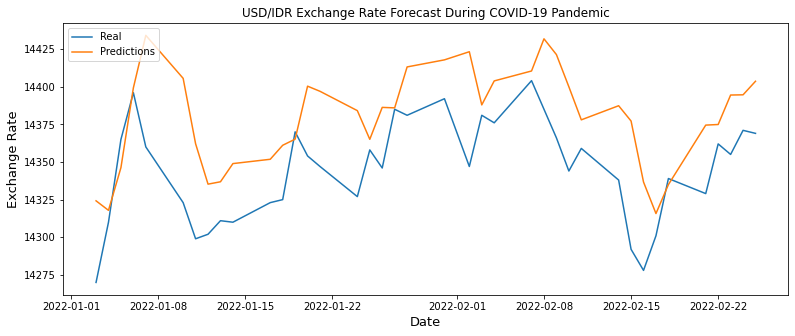

In [8]:
plt.figure(figsize=(13,5))
plt.title('USD/IDR Exchange Rate Forecast During COVID-19 Pandemic')
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Exchange Rate', fontsize = 13)
plt.plot(valid[['Rate', 'Predictions']])
plt.legend(['Real', 'Predictions'], loc = 'upper left')
plt.show